In [1]:
import sys

import numpy as np
from matplotlib import pyplot as plt
import scipy
from sympy import *
import pandas as pd

source = "../source"
sys.path.append(source)
import publication
from data import gen_rand_seq

In [2]:
def gen_data(symbols, seq_lens):
    full_data = []
    for seq_len in seq_lens:
        data = gen_rand_seq(seq_len, symbols, len(symbols) ** seq_len)
        data = ["".join(x) for x in data]
        full_data += data
    return full_data

In [3]:
### ADD MORE FREEDOM IN RECURRENT PARAMETERIZATION, NOT ENOUGH FREE MOVEMENT

In [4]:
plt.figure(figsize=(4, 4))
publication.set_color_gradient(2)
plt.imshow(np.array(N / 1000 * (N / 1000 + I).inv()).astype(float))
plt.title("Representational distance")
labels = np.array(train_data)
publication.im_show(x_labels=labels, y_labels=labels)

plt.figure(figsize=(4, 4))
publication.set_color_gradient(2)
plt.imshow(np.array(N).astype(float))
plt.title("Representational distance")
labels = np.array(train_data)
publication.im_show(x_labels=labels, y_labels=labels)

TypeError: unsupported operand type(s) for /: 'function' and 'int'

<Figure size 400x400 with 0 Axes>

In [57]:
N * y

Matrix([
[ 1],
[-1],
[ 0],
[ 2],
[ 0],
[-2],
[ 1],
[ 1],
[-1],
[-1],
[ 3],
[-3],
[-1],
[ 1]])

In [49]:
labels = np.array(train_data + ["initial"])
labels

array(['1', '0', '01', '11', '00', '10', '010', '000', '110', '101',
       '011', '111', '001', '100', 'initial'], dtype='<U7')

Fraction merged: 0.151


/tmp/ipykernel_15998/366513819.py:27: SymPyDeprecationWarning: 

non-Expr objects in a Matrix is deprecated. Matrix represents
a mathematical matrix. To represent a container of non-numeric
entities, Use a list of lists, TableForm, NumPy array, or some
other data structure instead.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-non-expr-in-matrix
for details.

This has been deprecated since SymPy version 1.9. It
will be removed in a future version of SymPy.

  h = Matrix([h, 0])


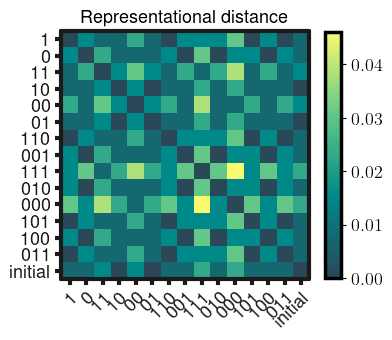

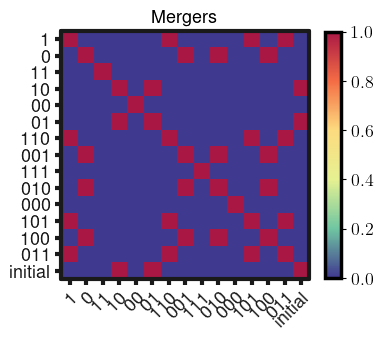

In [67]:
train_data = gen_data(["0", "1"], [1, 2, 3, 4, 5])
# train_data = gen_data(["1"], [1, 2, 3, 4, 5, 6])

n_datapoints = len(train_data)

parities = np.array([sum([int(s) for s in x]) & 1 for x in train_data])
y = Matrix((-1) ** parities)
# y = Matrix((1) ** parities)


N = Matrix(
    [
        [sum(sum(s_1 == s_2 for s_2 in x_2) for s_1 in x_1) for x_2 in train_data]
        for x_1 in train_data
    ]
)

I = eye(N.shape[0])

U, S = (N + I).diagonalize()
V, Sigma = N.diagonalize()

A = U * Sigma * (Sigma + I).inv() * U.inv()

h = A * y

h = Matrix([h, 0])

H = scipy.spatial.distance_matrix(h, h)

frac_merged = sum(sum(H == 0)) / (H.shape[0] ** 2)
print(f"Fraction merged: {frac_merged:.3f}")

indices = [True] * (len(train_data) + 1)
indices = [len(x) <= 3 for x in train_data] + [True]

H_plot = H[indices][:, indices]
labels = np.array(train_data + ["initial"])[indices]

# z = np.array(N * (N + I).inv() * y)[indices]
# Z = scipy.spatial.distance_matrix(z, z)

# plt.figure(figsize=(4, 4))
# publication.set_color_gradient(0)
# plt.imshow(Z.astype(float))
# plt.title("Representational distance")
# publication.im_show(x_labels=labels, y_labels=labels)

plt.figure(figsize=(4, 4))
publication.set_color_gradient(2)
plt.imshow(H_plot.astype(float))
plt.title("Representational distance")
publication.im_show(x_labels=labels, y_labels=labels)

plt.figure(figsize=(4, 4))
publication.set_color_gradient(0)
plt.imshow((H_plot == 0).astype(float))
plt.title("Mergers")
publication.im_show(x_labels=labels, y_labels=labels)

In [126]:
clusters = pd.DataFrame(train_data).groupby(np.array(h)[:, 0])
for rep, x in clusters:
    print(f"{rep}: {x.to_numpy()}")
    print("")

-3/161: [['111111']]

-5/322: [['11111']]

-2/161: [['1111']
 ['111011']
 ['111101']
 ['111110']
 ['101111']
 ['011111']
 ['110111']]

-3/322: [['111']
 ['11101']
 ['01111']
 ['10111']
 ['11110']
 ['11011']]

-1/161: [['11']
 ['1110']
 ['1011']
 ['0111']
 ['1101']
 ['111001']
 ['101110']
 ['011101']
 ['111010']
 ['010111']
 ['100111']
 ['111100']
 ['101011']
 ['110110']
 ['110101']
 ['011011']
 ['110011']
 ['001111']
 ['101101']
 ['011110']]

-1/322: [['1']
 ['110']
 ['011']
 ['101']
 ['01011']
 ['10011']
 ['11010']
 ['01101']
 ['01110']
 ['11100']
 ['10101']
 ['00111']
 ['10110']
 ['11001']]

0: [['01']
 ['10']
 ['0011']
 ['0110']
 ['1100']
 ['1010']
 ['1001']
 ['0101']
 ['110001']
 ['011001']
 ['001011']
 ['000111']
 ['110100']
 ['001101']
 ['010110']
 ['010011']
 ['011010']
 ['100101']
 ['110010']
 ['101001']
 ['001110']
 ['011100']
 ['100011']
 ['101100']
 ['100110']
 ['111000']
 ['101010']
 ['010101']]

1/322: [['0']
 ['010']
 ['001']
 ['100']
 ['01010']
 ['10100']
 ['01001']
 ['0